## PART 4: Main Func: with Modifier.py
Error: the NaN values for X show up when Modifier can't generate (given the interval) new values.

[*MAIN*]: Main loop started with parameters:  {'domain_min_range': 1, 'domain_max_range': 100, 'modifier_incremental_unit': 3, 'modifier_data_point': 10}
[*MAIN*]: Main loop started with settings:  {'do_plot': False, 'extensive_search': True, 'extensive_iteration': False} 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [(1, 100)]
[MOD]: iteration:  0 , interval:  1 - 100

Simulator...
  * Sim_y shape:    (10,)


 Modx:  [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0] 
symx:  [-15.937370765321658, -14.082834658416713, -27.76015148557625, -1.2020059518069068, 8.14522585513821, 35.92648806634415, 24.135054219039624, 39.2793177120579, 33.537764391204234, 61.5573105495588]
       *** USING validator_controller
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [ 0.          1.362367

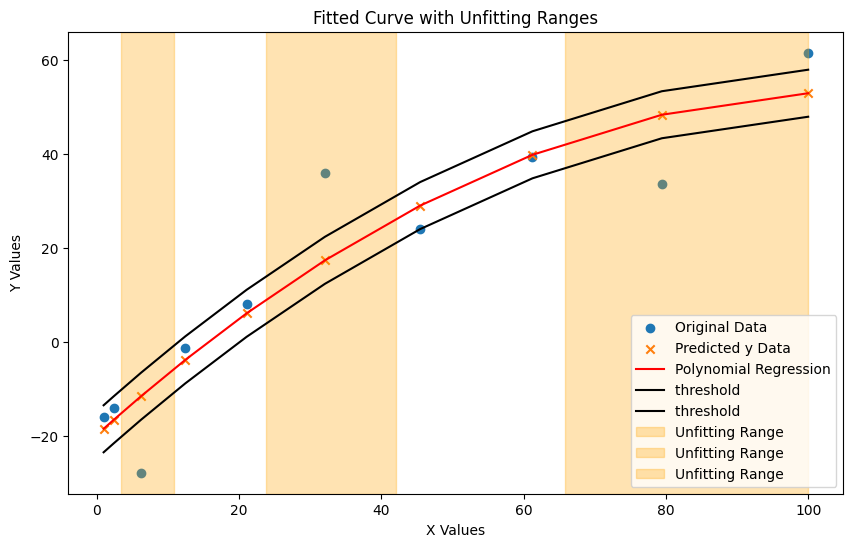

       *** OUTPUT unfitting_ranges [[3.391304347826087, 10.923913043478262], [23.83695652173913, 42.130434782608695], [65.80434782608695, 100.0]] 

       *** OUTPUT validator_ranges [[3.391304347826087, 10.923913043478262], [23.83695652173913, 42.130434782608695], [65.80434782608695, 100.0]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[3.391304347826087, 10.923913043478262], [23.83695652173913, 42.130434782608695], [65.80434782608695, 100.0]]
[MOD]: iteration:  0 , interval:  3.391304347826087 - 10.923913043478262
[MOD]: iteration:  1 , interval:  23.83695652173913 - 42.130434782608695
[MOD]: iteration:  2 , interval:  65.80434782608695 - 100.0

Simulator...
  * Sim_y shape:    (10,)


 Modx:  [3.391304347826087, 10.923913043478262, 23.83695652173913, 31.945539148825304, 42.130434782608695, 65.80434782608695, 73.22846517356957, 81.40244631838262, 90.32629126052609, 100.0] 
symx:  [-8.093149074128482, 1.6484958233644305, 10.90851413998941, 14.59117189072055

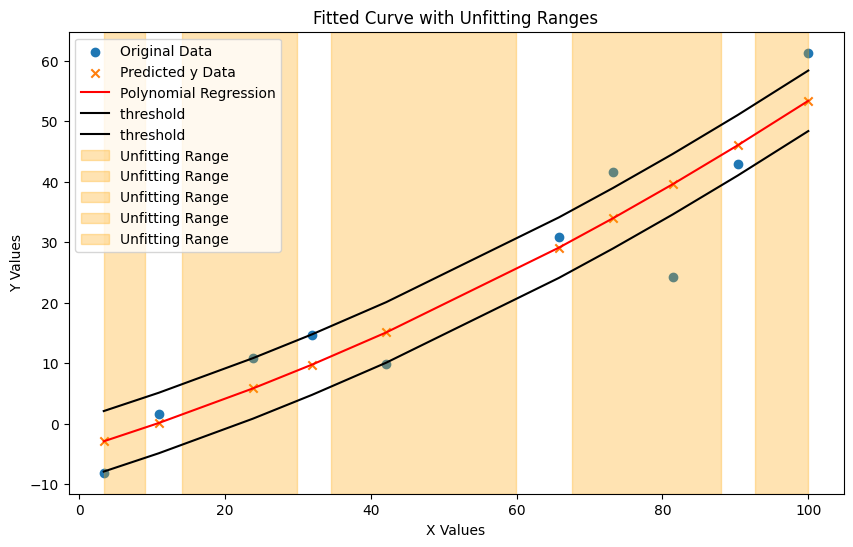

       *** OUTPUT unfitting_ranges [[3.391304347826087, 9.040760869565219], [14.152173913043478, 29.91839349205376], [34.49176305727115, 59.88586956521739], [67.66037716295762, 88.09533002499022], [92.74471844539457, 100.0]] 

       *** OUTPUT validator_ranges [[3.391304347826087, 9.040760869565219], [14.152173913043478, 29.91839349205376], [34.49176305727115, 59.88586956521739], [67.66037716295762, 88.09533002499022], [92.74471844539457, 100.0]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[3.391304347826087, 9.040760869565219], [14.152173913043478, 29.91839349205376], [34.49176305727115, 59.88586956521739], [67.66037716295762, 88.09533002499022], [92.74471844539457, 100.0]]
[MOD]: iteration:  0 , interval:  3.391304347826087 - 9.040760869565219
[MOD]: iteration:  1 , interval:  14.152173913043478 - 29.91839349205376
[MOD]: iteration:  2 , interval:  34.49176305727115 - 59.88586956521739
[MOD]: iteration:  3 , interval:  67.66037716295762 - 88.095330024990

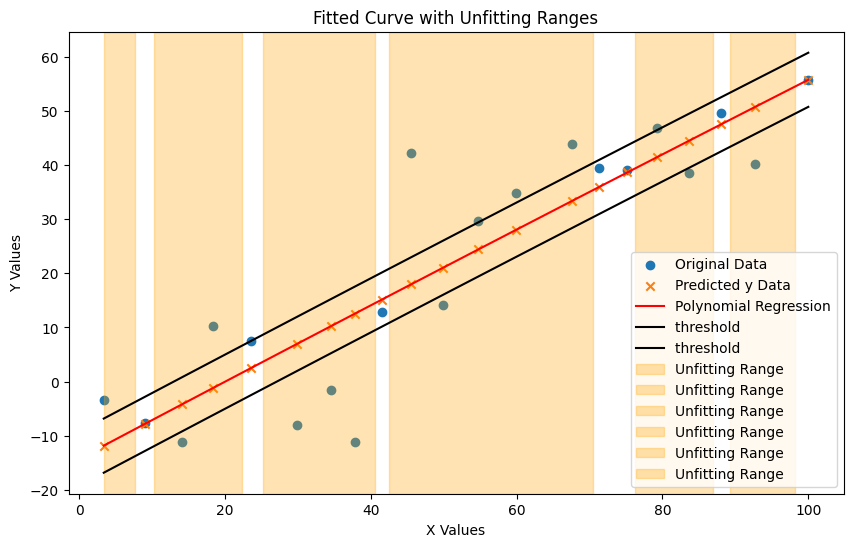

       *** OUTPUT unfitting_ranges [[3.391304347826087, 7.6283967391304355], [10.318614130434783, 22.30599099665065], [25.194480344189568, 40.578378240680834], [42.51248492580399, 70.40986134461976], [76.2245884555868, 86.96832946600767], [89.25767713009131, 98.18617961134865]] 

       *** OUTPUT validator_ranges [[3.391304347826087, 7.6283967391304355], [10.318614130434783, 22.30599099665065], [25.194480344189568, 40.578378240680834], [42.51248492580399, 70.40986134461976], [76.2245884555868, 86.96832946600767], [89.25767713009131, 98.18617961134865]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[3.391304347826087, 7.6283967391304355], [10.318614130434783, 22.30599099665065], [25.194480344189568, 40.578378240680834], [42.51248492580399, 70.40986134461976], [76.2245884555868, 86.96832946600767], [89.25767713009131, 98.18617961134865]]
[MOD]: iteration:  0 , interval:  3.391304347826087 - 7.6283967391304355
[MOD]: iteration:  1 , interval:  10.31861413043478

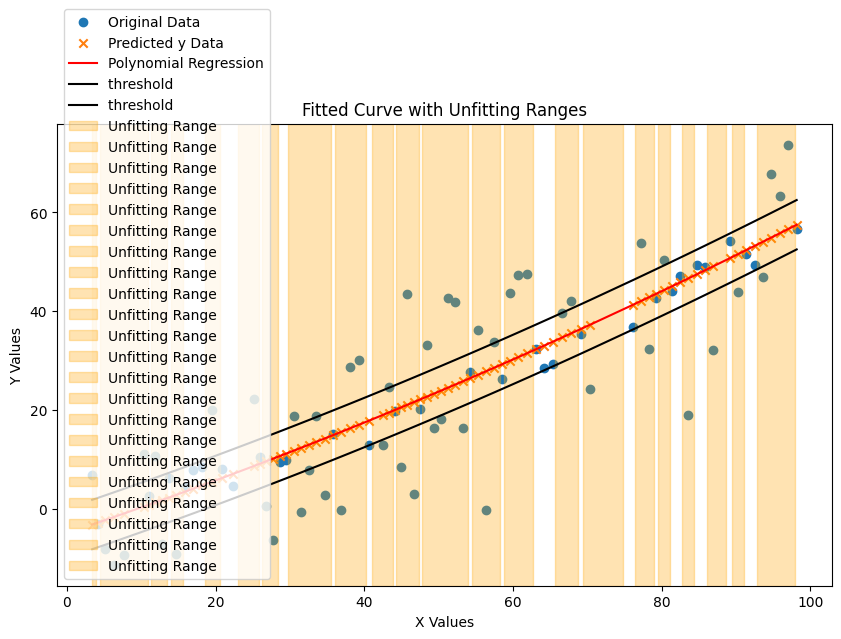

       *** OUTPUT unfitting_ranges [[3.391304347826087, 3.9647213372742813], [4.396118848888937, 10.877593701543244], [11.26746952087294, 13.475190196382215], [13.96840264725623, 15.551376631422595], [18.534122043514273, 20.530442553857924], [23.02811333353538, 25.798987982722295], [26.209835325377057, 28.381705793145038], [29.778935077401165, 35.50596239274368], [36.073654741390676, 40.2670841903087], [41.06190491196162, 43.91482448147034], [44.325374997311826, 47.32835434070988], [47.77579792298212, 54.01222312317121], [54.52422957169728, 58.23740044388748], [58.78629995884432, 62.75772229604985], [65.73280153602629, 68.82317160859887], [69.45508052302492, 74.77090667784503], [76.47830137773619, 79.04849860614375], [79.57245845389934, 81.1641788013143], [82.78566035495152, 84.43690311481099], [86.11790708089272, 88.68534021407041], [89.52622125550215, 91.1464616455059], [92.79362894812563, 97.89669233168091]] 

       *** OUTPUT validator_ranges [[3.391304347826087, 3.964721337274281

In [1]:
# IMPORT LIBRARIES
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from itertools import compress

# import global parameters 
# TODO: make interface (widget) to load/change the parameters (low-priority)
from global_settings import threshold_x_interval,threshold_y_fitting, mdv
from global_settings import mdv,simexSettings

#import classes for Modifier, Simulator, and Validator,
from Validator import Validator
from Modifier import Modifier
from Simulator import Simulator
from Logger import Logger

validator = Validator
modifier = Modifier
simulator = Simulator
logger = Logger()

mainfunc=True
# Initialize interval list
interval_lists=[(mdv["domain_min_range"], mdv["domain_max_range"])]
print('[*MAIN*]: Main loop started with parameters: ',mdv)
print('[*MAIN*]: Main loop started with settings: ',simexSettings,'\n')

while mainfunc:
    
    # Calls Modifier Controller
    mod_x_list= modifier.modifier_controller(ranges_list=interval_lists,local_modifier=modifier.local_modifier_A, do_plot=simexSettings["do_plot"])

    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ["modifier_data_point"] < mdv["modifier_incremental_unit"]:
        print('[*MAIN*]: --   ITERATIONS END HERE  --')
        break
    
    # Calls Simulator
    mod_x,sim_y_list = simulator.simulator_controller(mod_x_list,selected_function=simulator.sim_func_B)
    assert len(mod_x) == len(sim_y_list)
    
    # print to see outputs from Mod and Sim controllers
    temp_log = "LEN OF MODX-SIMY: ",str(len(mod_x))," symx: ",str(len(sim_y_list))
    logger.log_main(temp_log)
    print('\n\n Modx: ',mod_x,'\nsymx: ',sim_y_list)
    
    # Calls Validator controller
    ranges = validator.validator_controller(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list))
    
    # Updates interval_list to new range output from validator controller
    interval_lists = ranges


# TODO: make a list of history variable that are needed in validator: i-e- number of points total, number of good points, etc. 